# Домашнее задание №3

Борисов Дмитрий Сергеевич

Вариант: 
* Классификаторы - К-ближайших соседей (К=3), Логистическая регрессия; 
* Классы - Power Failure, Overstrain Failure; 
* Признаки - 'Process temperature [K]', 'Rotational speed [rpm]'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns

## Загрузка датасета

In [2]:
df = pd.read_excel('predictive_maintenance.xlsx')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [4]:
unique_values = df['Failure Type'].value_counts()
print(unique_values)

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


## Подготовка датасета

In [5]:
classes = ['Power Failure', 'Overstrain Failure']
features = ['Process temperature [K]', 'Rotational speed [rpm]']
df_2cls = df[df['Failure Type'].isin(classes)]
df_2cls

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
168,169,L47348,L,298.4,308.3,1433,62.3,20,1,Power Failure
...,...,...,...,...,...,...,...,...,...,...
9667,9668,L56847,L,299.2,310.3,1352,48.9,238,1,Overstrain Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [6]:
X = df_2cls[features]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_2cls['Failure Type'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [8]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

## Обучение моделей

In [9]:
model_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_norm, y_train)
model_lr = LogisticRegression().fit(X_train_norm, y_train)

## Оценка моделей

In [10]:
y_pred_knn_prob = model_knn.predict_proba(X_test_norm)[:, 1] 
y_pred_lr_prob = model_lr.predict_proba(X_test_norm)[:, 1]
print(f"Probability for KNeighborsClassifier: {y_pred_knn_prob}\n")
print(f"Probability for LogisticRegression: {y_pred_lr_prob}")

Probability for KNeighborsClassifier: [0.66666667 1.         0.33333333 0.33333333 0.         0.33333333
 0.33333333 0.66666667 0.33333333 0.33333333 0.66666667 0.66666667
 1.         0.33333333 0.33333333 0.33333333 1.         0.33333333
 1.         0.         0.         0.         1.         0.
 1.         0.33333333 0.         0.66666667 0.33333333 0.
 0.66666667 0.         0.33333333 0.33333333 0.66666667 1.
 1.         0.33333333 1.         0.33333333 0.66666667 0.66666667
 0.33333333 1.         1.         1.         0.33333333 0.
 0.66666667 0.         0.33333333 0.66666667]

Probability for LogisticRegression: [0.38566682 0.42977182 0.42908713 0.53449341 0.45843479 0.42964933
 0.43837247 0.39553296 0.45377305 0.45046984 0.48181397 0.43061045
 0.964216   0.47556898 0.38419092 0.44582689 0.96847704 0.41180464
 0.96098922 0.45207761 0.38696049 0.46957158 0.976935   0.47314351
 0.95473758 0.46212004 0.4200407  0.48937251 0.43797654 0.46756786
 0.39666108 0.5128865  0.39983941 0.3835

In [11]:
y_pred_knn = model_knn.predict(X_test_norm)
y_pred_lr = model_lr.predict(X_test_norm)
print(f"Predictions for KNeighborsClassifier: {y_pred_knn}\n")
print(f"Predictions for LogisticRegression: {y_pred_lr}")

Predictions for KNeighborsClassifier: [1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1]

Predictions for LogisticRegression: [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0]


### Confusion matrix

Report for model_knn
              precision    recall  f1-score   support

           0       0.48      0.70      0.57        20
           1       0.74      0.53      0.62        32

    accuracy                           0.60        52
   macro avg       0.61      0.62      0.59        52
weighted avg       0.64      0.60      0.60        52



<Axes: >

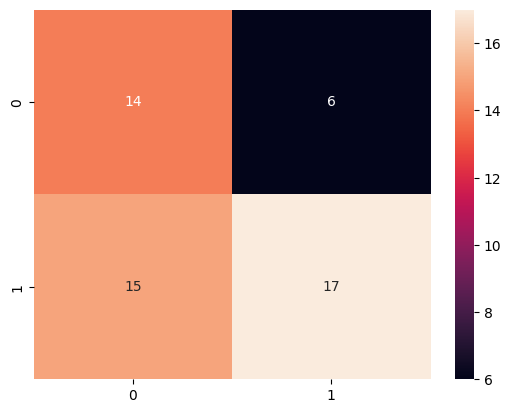

In [12]:
print('Report for model_knn')
print(classification_report(y_test, y_pred_knn))
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot=True, fmt="d")

Report for model_lr
              precision    recall  f1-score   support

           0       0.47      0.90      0.62        20
           1       0.86      0.38      0.52        32

    accuracy                           0.58        52
   macro avg       0.67      0.64      0.57        52
weighted avg       0.71      0.58      0.56        52



<Axes: >

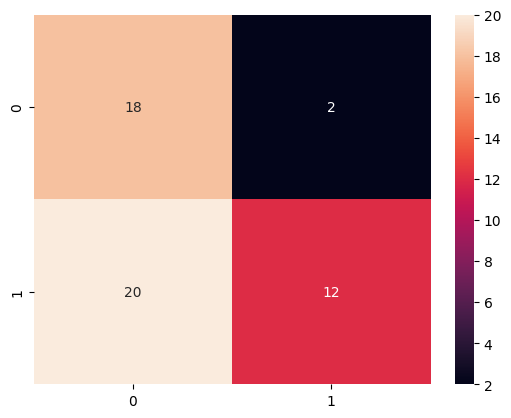

In [13]:
print('Report for model_lr')
print(classification_report(y_test, y_pred_lr))
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_mat_lr, annot=True, fmt="d")

### ROC curve

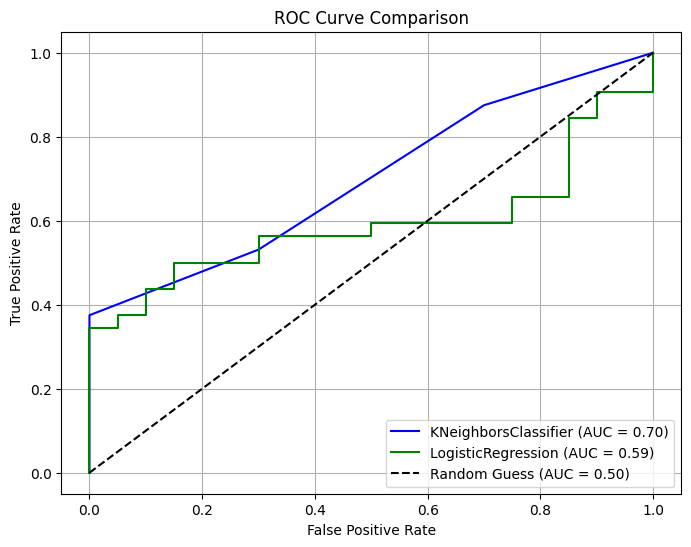

In [14]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred_knn_prob)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_lr_prob)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'KNeighborsClassifier (AUC = {roc_auc1:.2f})', color='blue')
plt.plot(fpr2, tpr2, label=f'LogisticRegression (AUC = {roc_auc2:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


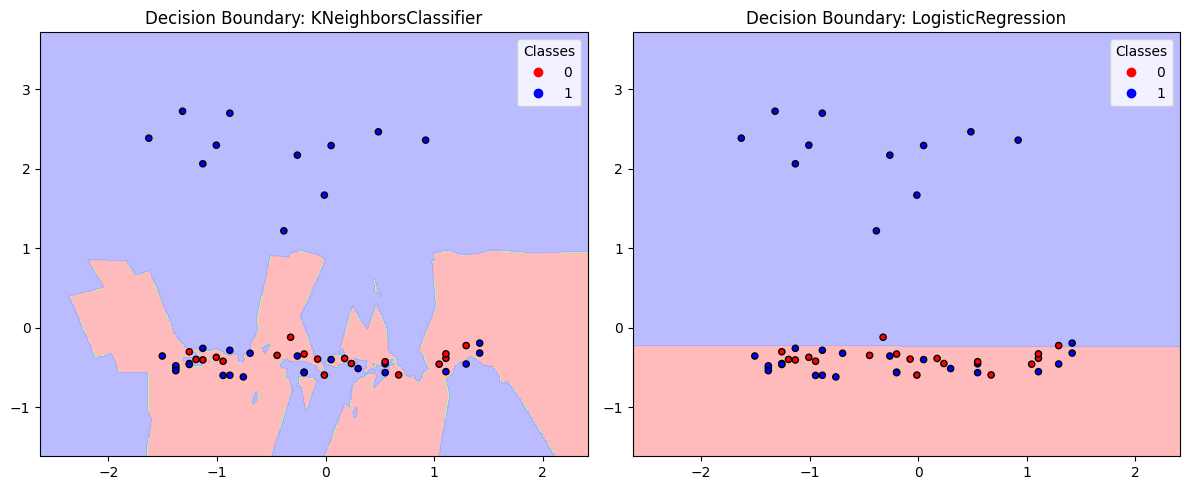

In [15]:
# Create a mesh grid
x_min, x_max = X_test_norm[:, 0].min() - 1, X_test_norm[:, 0].max() + 1
y_min, y_max = X_test_norm[:, 1].min() - 1, X_test_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 1: Predict on the grid for both models
Z1 = model_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

Z2 = model_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# Step 2: Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# KNeighborsClassifier 
axes[0].contourf(xx, yy, Z1, alpha=0.8, cmap=cmap_light)
scatter1 = axes[0].scatter(X_test_norm[:, 0], X_test_norm[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
axes[0].set_title("Decision Boundary: KNeighborsClassifier")
axes[0].set_xlim(xx.min(), xx.max())
axes[0].set_ylim(yy.min(), yy.max())
axes[0].legend(*scatter1.legend_elements(), title="Classes")

# LogisticRegression
axes[1].contourf(xx, yy, Z2, alpha=0.8, cmap=cmap_light)
scatter2 = axes[1].scatter(X_test_norm[:, 0], X_test_norm[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
axes[1].set_title("Decision Boundary: LogisticRegression")
axes[1].set_xlim(xx.min(), xx.max())
axes[1].set_ylim(yy.min(), yy.max())
axes[1].legend(*scatter2.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()


### Оценка посредством скользящего контроля

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()

In [17]:
knn_scores = cross_val_score(knn, X_train_norm, y_train, cv=5, scoring='f1')
lr_scores = cross_val_score(lr, X_train_norm, y_train, cv=5, scoring='f1')

In [18]:
print(f"KNeighborsClassifier Cross-Validation Scores: {knn_scores}")
print(f"LogisticRegression Cross-Validation Scores: {lr_scores}")
print(f"\nKNeighborsClassifier Mean F1: {np.mean(knn_scores):.4f} ± {np.std(knn_scores):.4f}")
print(f"LogisticRegression Mean F1: {np.mean(lr_scores):.4f} ± {np.std(lr_scores):.4f}")


KNeighborsClassifier Cross-Validation Scores: [0.64       0.69230769 0.43478261 0.47619048 0.56      ]
LogisticRegression Cross-Validation Scores: [0.66666667 0.28571429 0.38095238 0.47058824 0.44444444]

KNeighborsClassifier Mean F1: 0.5607 ± 0.0965
LogisticRegression Mean F1: 0.4497 ± 0.1258


## Вывод
Оценка классификаторов без скользящего контроля показала близкие результаты, однако после применения данного подхода классификатор K ближайших соседей показал лучший результат по метрике F1, в сравнении с логистической регрессией. Это может быть обусловлено линейной неразделимостью данных, как показано на графиках визуализации разделяющей границы.